# DIAMOND

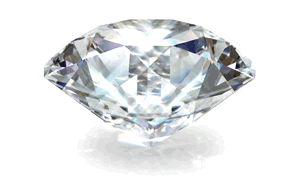

## This project explores the Diamond dataset as following:
<br> 1. Data visualization with matplotlib, seaborn, plotly
<br> 2. Descriptive statistics
<br> 3. Machine learning to  predict the price: multiple linear regression, random forest, AdaBoostRegressor
<br> 4. Conclusion

In [434]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Pre-processing data

## Dataset information
This document explores a dataset containing prices and attributes for approximately 54,000 round-cut diamonds.
There are 53,940 diamonds in the dataset with 10 features (carat, cut, color, clarity, depth, table, price, x, y, and z). Most variables are numeric in nature, but the variables cut, color, and clarity are ordered factor variables with the following levels.
About the currency for the price column: it is Price ($)
And About the columns x,y, and z they are diamond measurements as (( x: length in mm, y: width in mm,z: depth in mm ))

In [435]:
df = pd.read_csv("Diamonds.csv").drop('Unnamed: 0', axis=1)

In [436]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [437]:
#Rename x,y,z for easy reading
df = df.rename(columns = {'x':'length_mm', 'y': 'width_mm', 'z':'depth_mm'})

In [438]:
df.head(3)

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [439]:
#To check all dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53943 non-null  float64
 1   cut        53943 non-null  object 
 2   color      53943 non-null  object 
 3   clarity    53943 non-null  object 
 4   depth      53943 non-null  float64
 5   table      53943 non-null  float64
 6   price      53943 non-null  int64  
 7   length_mm  53943 non-null  float64
 8   width_mm   53943 non-null  float64
 9   depth_mm   53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [440]:
features = ['cut','color','clarity']
for i in features:
    print(df[i].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [441]:
#To save memory
df['cut'] = df['cut'].astype('category')
df['color'] = df['color'].astype('category')
df['clarity'] = df['clarity'].astype('category')

In [442]:
# After some processing, we save about 1.1 MB
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   carat      53943 non-null  float64 
 1   cut        53943 non-null  category
 2   color      53943 non-null  category
 3   clarity    53943 non-null  category
 4   depth      53943 non-null  float64 
 5   table      53943 non-null  float64 
 6   price      53943 non-null  int64   
 7   length_mm  53943 non-null  float64 
 8   width_mm   53943 non-null  float64 
 9   depth_mm   53943 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## Descriptive statistics

In [443]:
df.describe()

,carat,depth,table,price,length_mm,width_mm,depth_mm
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [444]:
# Check missing values
df.isna().sum().sum()

0

## Scatter plot matrix
To show combinations of quantitative variables.

In [445]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'length_mm', 'width_mm', 'depth_mm'],
      dtype='object')

In [446]:
plot_data_1.head()

,carat,depth,table,price,length_mm,width_mm,depth_mm
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [447]:
df.head()

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


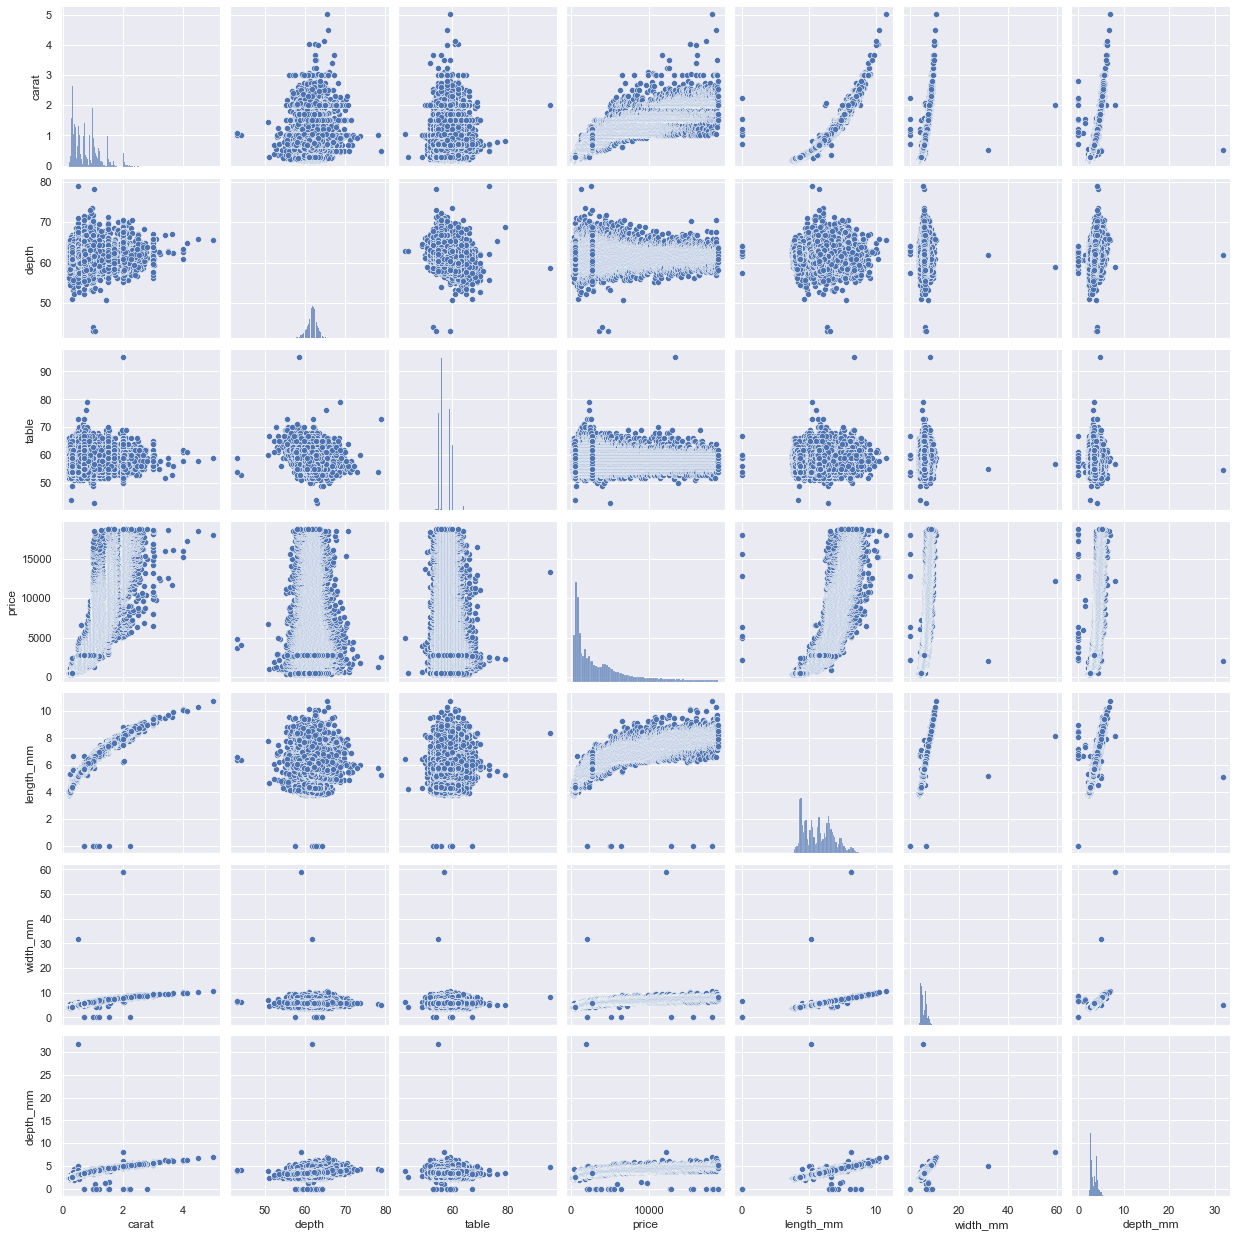

In [448]:
plot_data_1 = df[['carat', 'depth', 'table', 'price', 'length_mm',
       'width_mm','depth_mm']]
sns.pairplot(plot_data_1) 
plt.show()


### Comment
<br> 1. When we look at the graph above, we can spot some relation between length, width, depth of the diamond with the carat => test for the correlation between them
<br> 2. The depth, width distributions look like a bell shape, but we need to check whether or not they're Guasian distribution with Kolmogorov-Smirnov (K-S) test, Anderson-Darling Test
<br> 3. We will look futher into the distribution of price

In [449]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [450]:
#Correlation
def corr(x,y):
    result = np.corrcoef(x, y)
    return result[0,1]
lc = corr(df['length_mm'], df['carat'])#length - carrat
wc = corr(df['width_mm'], df['carat'])#With - carrat
dc = corr(df['depth_mm'], df['carat'])#Depth - carrat
print(f"Correlation between length and carrat is {round(lc,2)}\n\
Correlation between width and carrat is {round(wc,2)}\n\
Correlation between depth and carrat is {round(dc,2)}")

Correlation between length and carrat is 0.98
Correlation between width and carrat is 0.95
Correlation between depth and carrat is 0.95


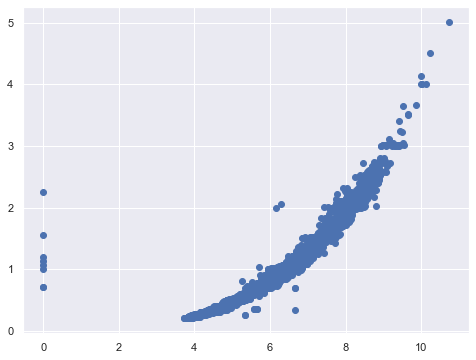

In [451]:
plt.figure(figsize=(8,6))
plt.scatter(df['length_mm'], df['carat'])
plt.plot()
plt.show()

### Perform Anderson-Darling Test
<br> H0: data is normally distributed
<br> H1: data is not normally distributed

In [452]:
from scipy.stats import anderson, kstest

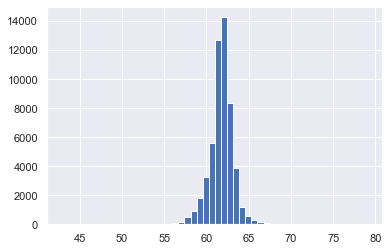

In [453]:
plt.hist(df['depth'],bins=50)
plt.show()

In [454]:
result_anderson = anderson(df['depth'])

#Interpret the result_anderson

print('Statistic: %.3f' % result_anderson.statistic)

for i in range(len(result_anderson.critical_values)):
    sl, cv = result_anderson.significance_level[i], result_anderson.critical_values[i]
    if result_anderson.statistic < result_anderson.critical_values[i]:
        print('%.3f: %.3f, not enough evidence to accept H0 (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, not enough evidence to accept (reject H0)' % (sl, cv))

Statistic: 502.628
15.000: 0.576, not enough evidence to accept (reject H0)
10.000: 0.656, not enough evidence to accept (reject H0)
5.000: 0.787, not enough evidence to accept (reject H0)
2.500: 0.918, not enough evidence to accept (reject H0)
1.000: 1.092, not enough evidence to accept (reject H0)


## Perform Kolmogorov-Smirnov (K-S) Test

In [455]:
result_ktest = kstest(df['depth'], 'norm')
result_ktest

KstestResult(statistic=1.0, pvalue=0.0)

### Interpret the Kolmogorov-Smirnov (K-S) Test
Since p_value < 0.05, there is not enough evidence to accept H0 => reject H0.

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   carat      53943 non-null  float64 
 1   cut        53943 non-null  category
 2   color      53943 non-null  category
 3   clarity    53943 non-null  category
 4   depth      53943 non-null  float64 
 5   table      53943 non-null  float64 
 6   price      53943 non-null  int64   
 7   length_mm  53943 non-null  float64 
 8   width_mm   53943 non-null  float64 
 9   depth_mm   53943 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


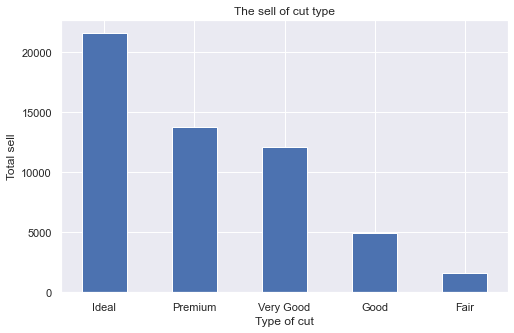

In [457]:
## What is the most cut that sold?
cut_ = pd.DataFrame(df['cut'].value_counts()).reset_index()

fig_cut_ = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(cut_['index'], cut_['cut'],width = 0.5)
 
plt.xlabel("Type of cut")
plt.ylabel("Total sell")
plt.title("The sell of cut type")
plt.show()

In [458]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


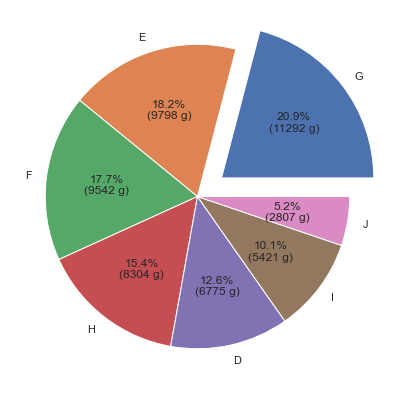

In [459]:
## best colour sell => the biggest slice will be exploded
# Creating plot
color_ = pd.DataFrame(df['color'].value_counts()).reset_index()

color_['percent'] = (color_['color'] / color_['color'].sum())

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)



def explode_part(df):
    max_ = max(df['percent'])
    for i in df['percent']:
        if i == max_:
            position = df[df['percent'] == max(df['percent'])]['index'].values
    explode = []
    for i in df['index']:
        if i == position:
            explode.append(0.2)
        else:
            explode.append(0.0)
    return explode
            


explode_info = explode_part(color_)

fig_pie = plt.figure(figsize =(10, 7))
plt.pie(color_['color'], labels = color_['index'],autopct = lambda pct: func(pct, color_['color']),
       explode = explode_info)
 
# show plot
plt.show()

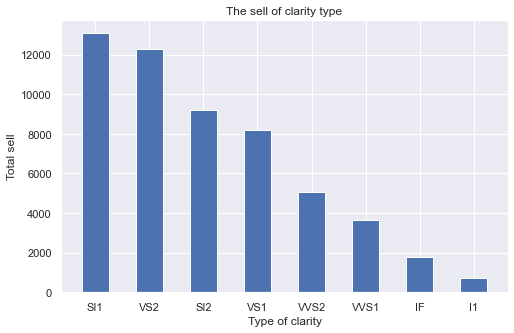

In [460]:
## How about clarity?

clarity_ = pd.DataFrame(df['clarity'].value_counts()).reset_index()

fig_cut_ = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(clarity_['index'], clarity_['clarity'],width = 0.5)
 
plt.xlabel("Type of clarity")
plt.ylabel("Total sell")
plt.title("The sell of clarity type")
plt.show()

## Comment:
According to total sell, we can see that:
<br> 1. Ideal is the best cut 
<br> 2. G colour is the best color
<br> 3. SI2 is the best clarity

## Sunburst graph
Each level of the hierarchy is represented by one ring or circle with the innermost circle as the top of the hierarchy.
<br> This graph is drawn by using plotly, which is an active graph drawing library.
<br> We can easily see the percentage (like a pie chart) groupby based on cut, color and clarity, instead of drawing too much grapgh at the same time.

In [461]:
import plotly.express as px

In [462]:
sunburst_data = df.groupby(['cut','color','clarity']).size()
sunburst_data = sunburst_data.reset_index()
sunburst_data.rename(columns = {0:'total'}, inplace = True)
sunburst_data.head()

,cut,color,clarity,total
0,Fair,D,I1,4
1,Fair,D,IF,3
2,Fair,D,SI1,58
3,Fair,D,SI2,56
4,Fair,D,VS1,5


In [463]:
#Vẽ biểu đồ sunburst
p1 = sunburst_data['cut']
p2 = sunburst_data['color']
p3 = sunburst_data['clarity']
v = sunburst_data['total']
fig5 = px.sunburst(sunburst_data, path=[p1,p2,p3], values=v,)
fig5.show()

## Boxplot of length, width, depth in mm

In [464]:
df.head()

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [465]:
df.cut.unique()


['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']

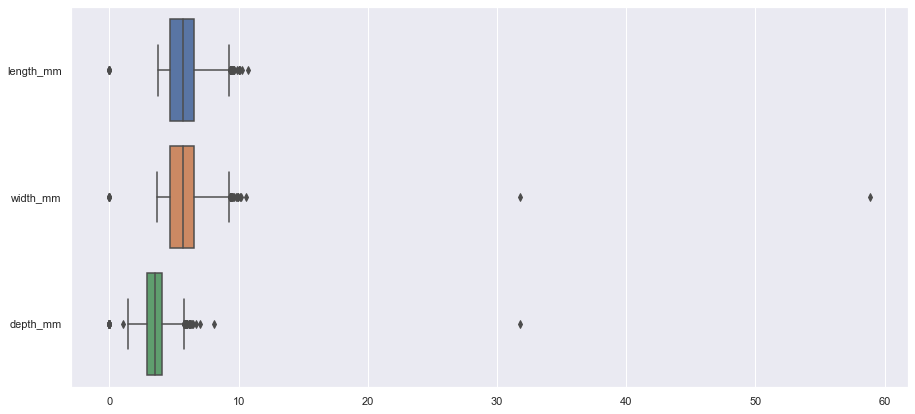

In [466]:
fig = plt.figure(figsize =(15, 7))
 
# Creating axes instance
data = df[['length_mm','width_mm','depth_mm']]
sns.set(style="darkgrid")
sns.boxplot(data=data, orient='h',)
plt.show()

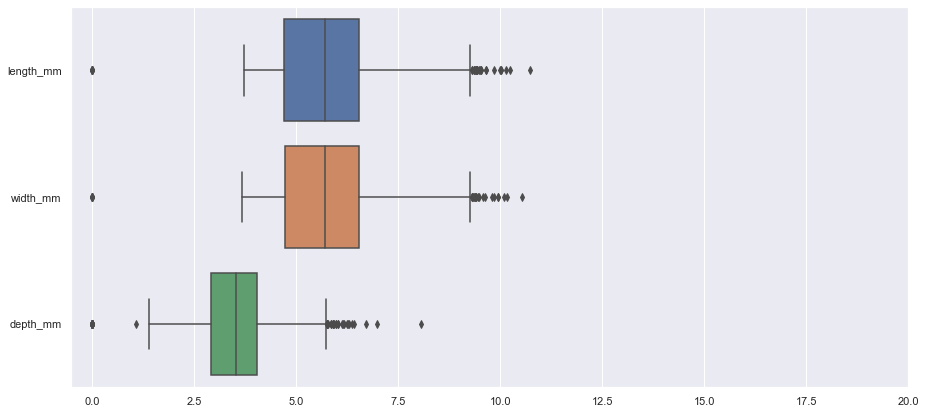

In [467]:
### There are some outliers, but they are rare, therefore, we can "Zoom" the boxplots
fig = plt.figure(figsize =(15, 7))
 
# Creating axes instance
data = df[['length_mm','width_mm','depth_mm']]
sns.set(style="darkgrid")
sns.boxplot(data=data, orient='h')

plt.xlim(-0.5, 20)
#plt.ylim(-1, 1)

plt.show()

### Diamond domain knowledge
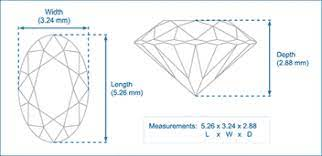

# Machine Learning

## Linear Regression Multiple Variables

In [468]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, r2_score
import math

In [469]:
X = df[['carat', 'depth', 'table', 'length_mm', 'width_mm', 'depth_mm']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [470]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [471]:
Y_predicted_linear = linear_reg.predict(X_test)

In [472]:
#Evaluation the model
print('MSE',mean_squared_error(y_test, Y_predicted_linear))
print('RMSE',math.sqrt(mean_squared_error(y_test, Y_predicted_linear)))
print('R Square:', r2_score(y_test,Y_predicted_linear))

MSE 2219922.409261797
RMSE 1489.9404046007335
R Square: 0.8599955138171438


In [473]:
linear_reg.coef_

array([10666.34947759,  -211.30740587,   -99.87777406, -1359.06595573,
          37.20558476,   165.84025935])

## Predict the price

In [474]:
promt = "Enter the following features, please distinguish between the depth and depth_mm"
print(promt)

Enter the following features, please distinguish between the depth and depth_mm


In [475]:
# cols = X_test.columns
cols = X_test.columns
l = len(cols)

exit = False
while not exit:
    features =[]
    for i in range(l):
        print(f'Please enter: {cols[i]}')
        content = float(input())
        features.append(content)
    customer_data = pd.DataFrame(features).T
    customer_data.columns = cols
    prediction = linear_reg.predict(customer_data)
    if prediction >= 0:
        print(f"The predicted price is: {prediction}")
        print('R Square:', r2_score(y_test,Y_predicted_linear))
        exit = True
        break
    else:
        print(f"Reenter the features, there is something wrong, press 'e' to exist, 'c' to continue")
        exit_ = input()
        if exit_ == 'e':
            exit = True
            break
        else:
            print(f"Reenter the features")

Please enter: carat
0.23
Please enter: depth
61.5
Please enter: table
55
Please enter: length_mm
3.95
Please enter: width_mm
3.98
Please enter: depth_mm
2.43
The predicted price is: [341.40705752]
R Square: 0.8599955138171438


## Random forest

In [476]:
from sklearn.ensemble import RandomForestRegressor

n_estimators : This is the number of trees to build before taking the maximum voting or averages of predictions. Higher number of trees give better performance but makes the code slower.

In [477]:
#Fit the model
random_forest_reg = RandomForestRegressor(n_estimators=40)
random_forest_reg.fit(X_train,y_train)
random_forest_reg.score(X_test,y_test)

0.8773700846489301

In [478]:
#Evaluation the model, better than the Linear Regression Multiple Variables in terms of MSE, RMSE and r2_score
y_predicted_random_forest = random_forest_reg.predict(X_test)
print('MSE',mean_squared_error(y_test, y_predicted_random_forest))
print('RMSE',math.sqrt(mean_squared_error(y_test, y_predicted_random_forest)))
print('R Square:', r2_score(y_test,y_predicted_random_forest))

MSE 1944429.8147572663
RMSE 1394.4281318007272
R Square: 0.8773700846489301
